In [5]:
import keras
from keras.datasets import mnist
from keras.layers import Dense,Flatten,Dropout,Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import cv2
(x_train,y_train),(X_test,Y_test)=mnist.load_data()
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


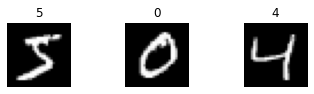

In [3]:
#Code to show the mnist datatset -->
plt.figure(1)
plt.subplot(331)
plt.title(y_train[0])
plt.axis('off')
img = cv2.cvtColor(x_train[0], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.subplot(332)
plt.title(y_train[1])
plt.axis('off')
img = cv2.cvtColor(x_train[1], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.subplot(333)
plt.title(y_train[2])
plt.axis('off')
img = cv2.cvtColor(x_train[2], cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
x_train=x_train.astype('float32')
X_test=X_test.astype('float32')
x_train/=255
X_test/=255
y_train=keras.utils.to_categorical(y_train, 10)
Y_test=keras.utils.to_categorical(Y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
my_model=keras.Sequential()
my_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
my_model.add(MaxPooling2D(pool_size=(2,2)))
my_model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
my_model.add(Conv2D(128,kernel_size=(2,2),activation='relu'))
my_model.add(MaxPooling2D(pool_size=(2,2)))
my_model.add(Flatten())
my_model.add(Dense(256,activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(64,activation='relu'))
my_model.add(Dropout(0.125))
my_model.add(Dense(10,activation='softmax'))
my_model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics='accuracy')

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [8]:
final_res=my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(X_test,Y_test))
my_model.save('Dig_model5.h5')
print("Model succesfully trained and saved")

Epoch 1/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1870 - accuracy: 0.9433 - val_loss: 0.0413 - val_accuracy: 0.9861
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0677 - accuracy: 0.9804 - val_loss: 0.0297 - val_accuracy: 0.9912
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0505 - accuracy: 0.9857 - val_loss: 0.0282 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0398 - accuracy: 0.9888 - val_loss: 0.0245 - val_accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0346 - accuracy: 0.9901 - val_loss: 0.0247 - val_accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0348 - val_accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.0251 -